In [85]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.interpolate import UnivariateSpline

In [180]:
# 1986-2004年的化石燃料排放CO2
year = np.linspace(1987,2004,18)
gamma1987_2004 = [5755,5968,6088,6151,6239,6178,6172,6284,6422,6550,6663,6638,6584,6750,6916,6981,7397,7782]
gamma1 = []

# 将化石燃料转化为PgC单位
for i in gamma1987_2004:
    j = i/1000
    gamma1.append(j)
# print(gamma1)

# 运用样条插值，确保gamma能够连续取值
gamma2 = UnivariateSpline(year, gamma1)
gamma2.set_smoothing_factor(0.5)
# print(gamma2(2000))

# 读取观测值数据集，跳过注释部分，取1986-2004内的数据
observation = pd.read_csv("co2_annmean_mlo.csv" , skiprows = 55)
observation1986_2004 = observation.loc[ (observation['year'] >1985) & (observation['year'] <2005) ]
observation1986_2004.head()

,year,mean,unc
27,1986,347.61,0.12
28,1987,349.31,0.12
29,1988,351.69,0.12
30,1989,353.20,0.12
31,1990,354.45,0.12


# 1.1 Caculation without buffer efffect

In [181]:
def fun1(y,t):
    y1 = y[0]
    y2 = y[1]
    k12=105/740
    k21=102/900
    gamma=gamma2(t)
    dydt = [-k12*y1+k21*y2+gamma, k12*y1-k21*y2]
    return dydt

# 初始条件
y0 = [740,900]
t = np.linspace(1987,2004,18)
# print(t)

# 求解
Solution1 = odeint(fun1,y0,t)[:, 0]/2.13
print(Solution1)

[347.41784038 348.74561854 350.10879164 351.49253483 352.88637601
 354.28350841 355.68019984 357.07539017 358.47033775 359.86836229
 361.27464319 362.69606337 364.14108621 365.61966444 367.14316646
 368.72431922 370.3771653  372.11702912]


# 1.2 Caculation with buffer efffect

In [182]:
def fun2(y,t):
    y1 = y[0]
    y2 = y[1]
    k12=105/(740+79)
    k21=102/(900-79)
    N20=821
    Xi=9.92#根据公式求得
    gamma=gamma2(t)
    dydt = [-k12*y1+k21*(N20+Xi*(y2-N20))+gamma, k12*y1-k21*(N20+Xi*(y2-N20))]
    return dydt

# 初始条件
yy = [740+79,900-79]
tt = np.linspace(1987,2004,18)

# 求解
Solution2 = odeint(fun2,yy,tt)[:, 0]/2.13
print(Solution2)

[384.50704225 386.36989916 388.76039838 391.31561695 393.93541573
 396.58882399 399.2643802  401.95739333 404.66668137 407.39372071
 410.14243515 412.9191631  415.73260831 418.59386013 421.51638127
 424.51601516 427.61097888 430.82186945]


# 1.3 reproduce Figure 2

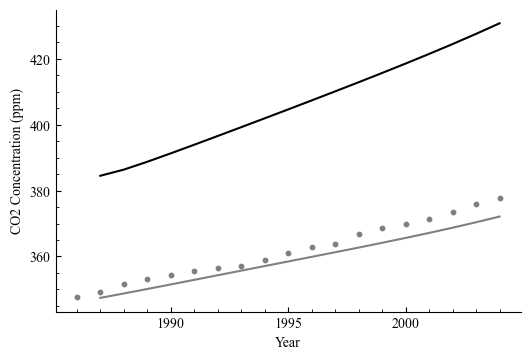

In [183]:
fig, ax = plt.subplots(figsize=(6,4),dpi=100)
ax.spines['right'].set_visible(False)                 #去除上右边框
ax.spines['top'].set_visible(False)
plt.rc('font',family='Times New Roman')               #设置字体
plt.rcParams['xtick.direction'] = 'in'                #将坐标轴的刻度线方向设置向内
plt.rcParams['ytick.direction'] = 'in'
ax.xaxis.set_major_locator(plt.MultipleLocator(5))    #设置坐标轴主次刻度
ax.xaxis.set_minor_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(20))
ax.yaxis.set_minor_locator(plt.MultipleLocator(5))

plt.plot(t,Solution1, c='gray', label='caculation without buffer effect')
plt.plot(t,Solution2, c='k')
plt.scatter(observation1986_2004['year'],observation1986_2004['mean'],s=10,c='gray',marker='o')
plt.xlabel("Year")
plt.ylabel("CO2 Concentration (ppm)")
# plt.legend()
plt.show()

# 1.4 reproduce Figure 4

In [202]:
def fun3(y,t):
    y1 = y[0], y2 = y[1], y3 = y[2], y4 = y[3], y5 = y[4], y6 = y[5], y7 = y[6]
    k12=60/615
    k21=60/842
    k23=9/842
    k24=43/842
    k32=52/9744
    k34=162/9744
    k43=205/26280
    k45=0.2/26280
    k51=0.2/90000000
    k67=62/731
    k71=62/1328  
    N20=821
    Xi=8.91#根据大气二氧化碳浓度公式求得
    gamma=gamma2(t)
    f=31.1
    Delte=0.08
    dydt = [ -k12*y1+k21*(N20+Xi*(y2-N20))+gamma-f+Delte+k51*y5+k71*y7, 
                        k12*y1-k21*(N20+Xi*(y2-N20))-k23*y2+k32*y3-k24*y2,
                        k23*y2-k32*y3-k34*y3+k43*y4,
                        k34*y3-k43*y4+k24*y2-k45*y4,
                        k45*y4-k51*y5,
                        f-k67*y6-2*Delte,
                        k67*y6-k71*y7+Delte]
    return dydt

bata=0.38
f0=62/2.13

# 初始条件
yyy = [615,842,9744,26280,90000000,731,1238]
ttt = np.linspace(1750,2000,251)

# 求解
Solution3 = odeint(fun3,yyy,ttt)[:, 0]/2.13
print(Solution3)

TypeError: cannot unpack non-iterable numpy.float64 object

In [197]:
def fun4(y,t):
    y1 = y[0], y2 = y[1], y3 = y[2], y4 = y[3], y5 = y[4], y6 = y[5], y7 = y[6]
    k12=60/615
    k21=60/842
    k23=9/842
    k24=43/842
    k32=52/9744
    k34=162/9744
    k43=205/26280
    k45=0.2/26280
    k51=0.2/90000000
    k67=62/731
    k71=62/1328  
    N20=821
    Xi=8.91#根据大气二氧化碳浓度公式求得
    gamma=gamma2(t)
    f=31.7
    Delte=0.08
    dydt = [ -k12*y1+k21*(N20+Xi*(y2-N20))+gamma-f+Delte+k51*y5+k71*y7, 
                        k12*y1-k21*(N20+Xi*(y2-N20))-k23*y2+k32*y3-k24*y2,
                        k23*y2-k32*y3-k34*y3+k43*y4,
                        k34*y3-k43*y4+k24*y2-k45*y4,
                        k45*y4-k51*y5,
                        f-k67*y6-2*Delte,
                        k67*y6-k71*y7+Delte]
    return dydt

bata=0.50

# 求解
Solution4 = odeint(fun4,yyy,ttt)[:, 0]/2.13
print(Solution4)

TypeError: cannot unpack non-iterable numpy.float64 object

看不懂报错，下载燃料燃烧速率的csv文件出错，无法得到gamma的函数